<a href="https://colab.research.google.com/github/jaehyun99/Computer_Vision/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

## 1. 히스토그램 평활화

In [ ]:
img = cv2.imread("drive/MyDrive/PR201910807/images/lab02_zebra.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)

(342, 392)


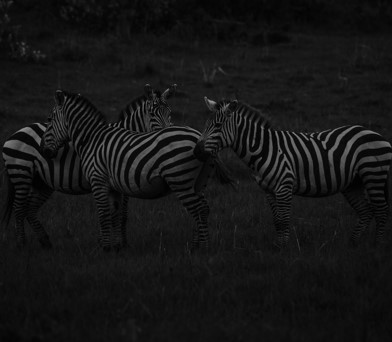

In [ ]:
cv2_imshow(img)

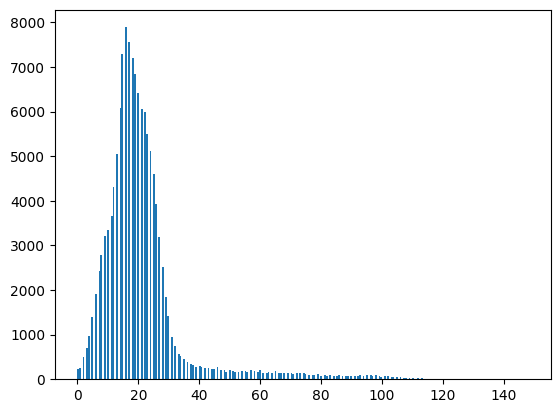

In [ ]:
plt.hist(img.flatten(), bins=256);

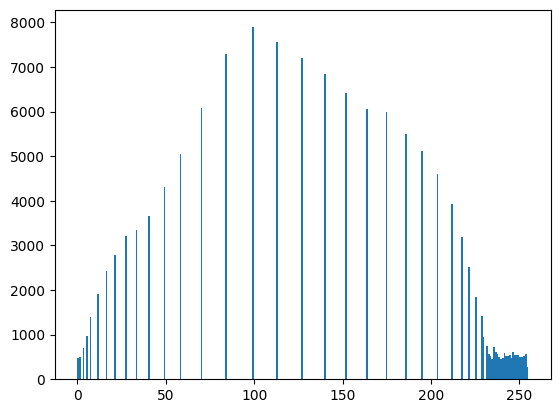

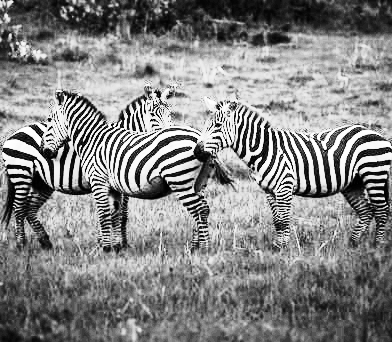

In [ ]:
imgEqualize = cv2.equalizeHist(img)
plt.hist(imgEqualize.flatten(), bins=256);
plt.show();
cv2_imshow(imgEqualize)

## 2. 히스토그램 역투영

In [ ]:
targetimg = cv2.imread("drive/MyDrive/PR201910807/images/lab02_person.jpg")
modelimg = cv2.imread("drive/MyDrive/PR201910807/images/lab02_modelpatch.jpg")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


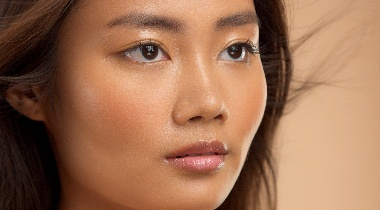

In [ ]:
cv2_imshow(targetimg)

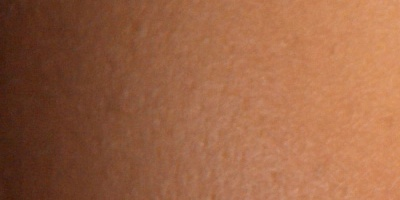

In [ ]:
cv2_imshow(modelimg)

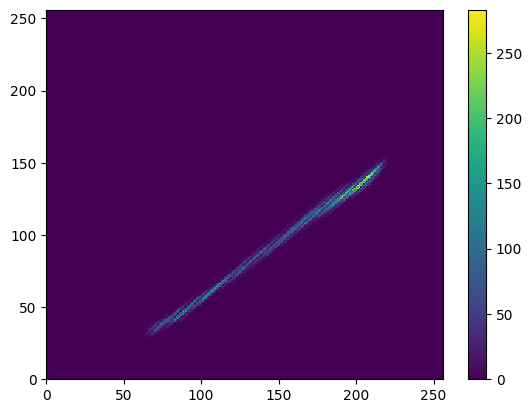

In [ ]:
## BGR 채널에서 G, R 사용
modelhist = cv2.calcHist([modelimg], [1,2], None, [256, 256], [0,256,0,256])
plt.pcolor(modelhist)
plt.colorbar()
plt.show()

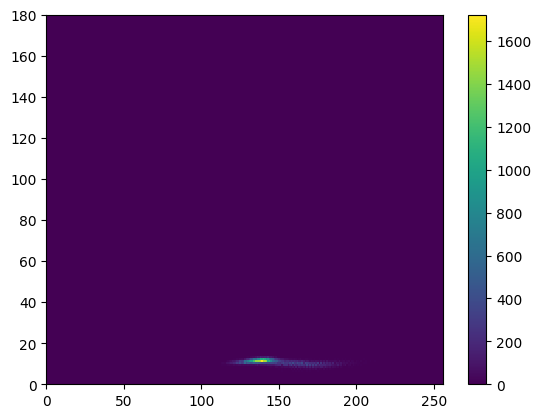

In [ ]:
## HSV 채널에서 H, S 사용

modelimg_hsv = cv2.cvtColor(modelimg, cv2.COLOR_BGR2HSV)
modelhist_hsv = cv2.calcHist([modelimg_hsv], [0,1], None,[180,256],[0,180,0,256])

plt.pcolor(modelhist_hsv)
plt.colorbar()
plt.show()

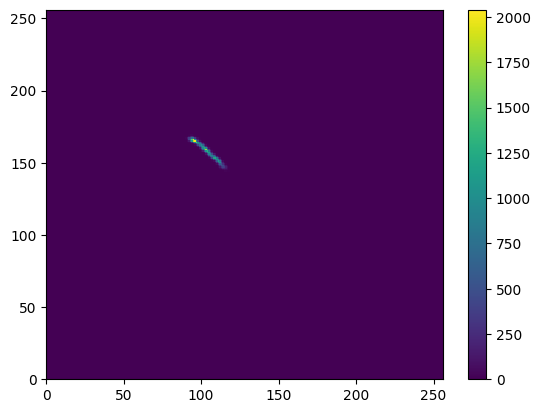

In [ ]:
## YCbCr 채널에서 Cb, Cr 사용

modelimg_ycbcr = cv2.cvtColor(modelimg, cv2.COLOR_BGR2YCrCb)
modelhist_ycbcr = cv2.calcHist([modelimg_ycbcr], [1,2], None,[256,256],[0,256,0,256])

plt.pcolor(modelhist_ycbcr)
plt.colorbar()
plt.show()

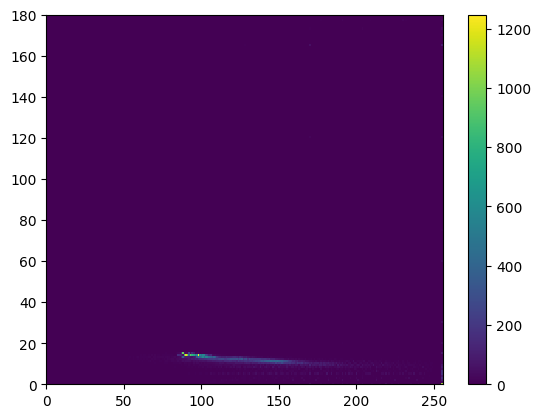

In [ ]:
## Target 이미지도 HSV 채널로 변경
targetimg_hsv = cv2.cvtColor(targetimg, cv2.COLOR_BGR2HSV)
targethist_hsv = cv2.calcHist([targetimg_hsv], [0,1], None,[180,256],[0,180,0,256])

plt.pcolor(targethist_hsv)
plt.colorbar()
plt.show()

In [ ]:
print(modelimg.size, targetimg.size)

240000 239400


In [ ]:
modelimg.shape

(200, 400, 3)

In [ ]:
## Model과 target 이미지의 histogram 정규화

modelhist_hsv = modelhist_hsv/modelimg.size
targethist_hsv = targethist_hsv/targetimg.size

## 최대 값이 1보다 작음
print("Max value of Model hist {}".format(modelhist_hsv.max()))
print("Max value of Target hist {}".format(targethist_hsv.max()))

Max value of Model hist 0.007179166666666667
Max value of Target hist 0.005208855472013367


In [ ]:
## 비율 히스토그램 생성
hist_r = modelhist_hsv/ (targethist_hsv + 1e-7)
hist_r = np.minimum(hist_r, 1.0)

In [ ]:
hist_r.shape

(180, 256)

In [ ]:
## 출력 이미지 저장을 위한 배열 생성
height, width = targetimg.shape[0], targetimg.shape[1]
output = np.zeros_like(targetimg, dtype='float32')

In [ ]:
for i in range(height):
  for j in range(width):
    h_val = targetimg_hsv[i,j,0]
    s_val = targetimg_hsv[i,j,1]
    confidence = hist_r[h_val, s_val]
    output[i,j] = confidence

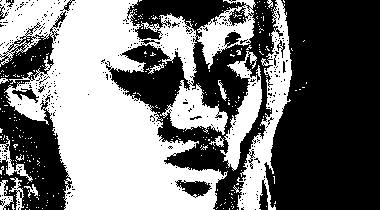

In [ ]:
ret, masked = cv2.threshold(output, 0.02, 255, cv2.THRESH_BINARY)
cv2_imshow(masked)